In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.drop("CustomerID", axis=1, inplace=True)
df["Gender"]=df["Gender"].map({"Male": 1, "Female": 0})

In [4]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


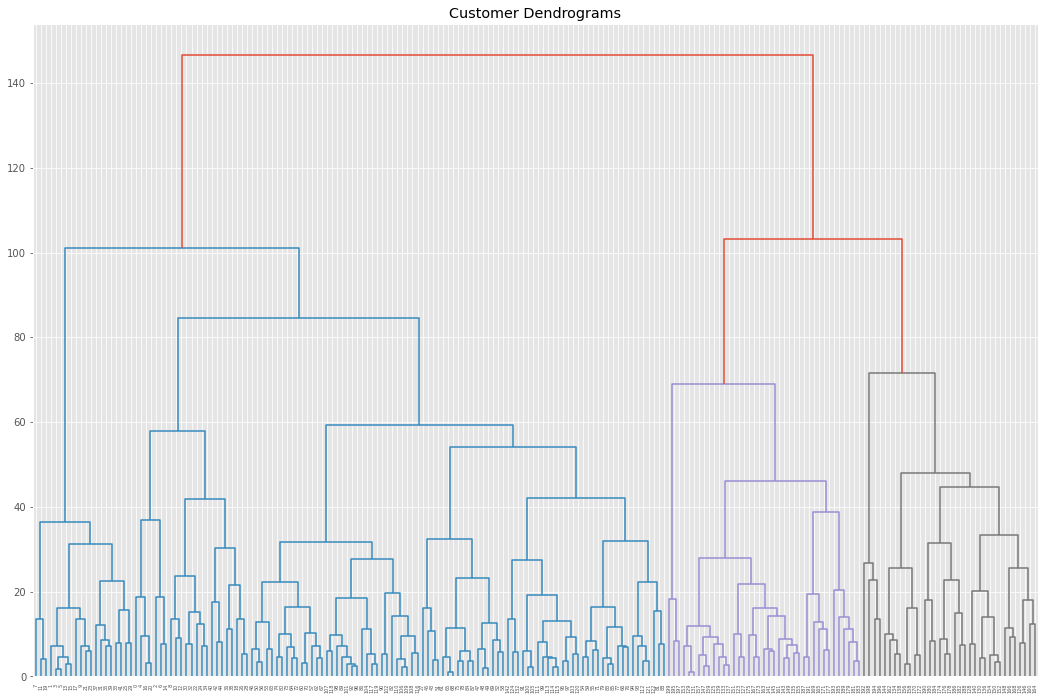

In [5]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(18,12))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(df, method="complete"))

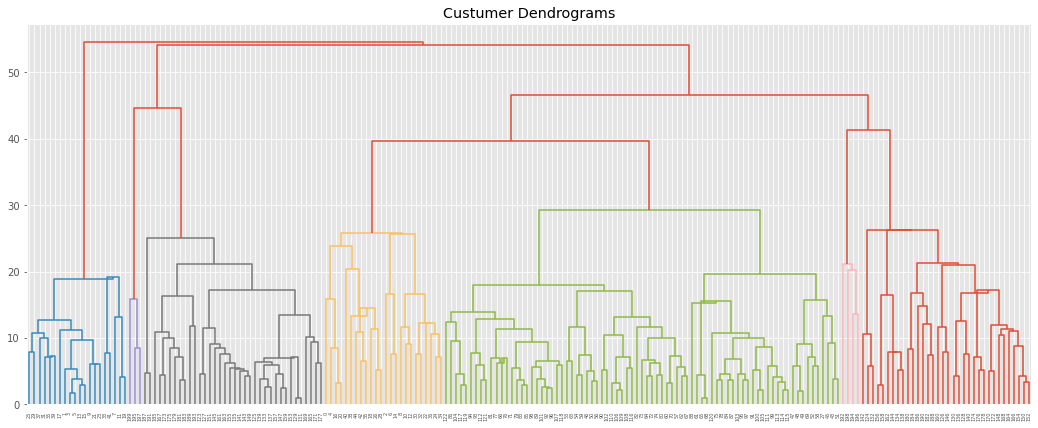

In [6]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(18,7))
plt.title("Custumer Dendrograms")
dend=shc.dendrogram(shc.centroid(df))

In [7]:
from sklearn.cluster import AgglomerativeClustering

data=df.copy()
data["cluster_agg"]=AgglomerativeClustering(n_clusters=3).fit_predict(df)
data["cluster_div"]=AgglomerativeClustering(n_clusters=5).fit_predict(df)

In [8]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_agg,cluster_div
0,1,19,15,39,0,4
1,1,21,15,81,0,3
2,0,20,16,6,0,4
3,0,23,16,77,0,3
4,0,31,17,40,0,4


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


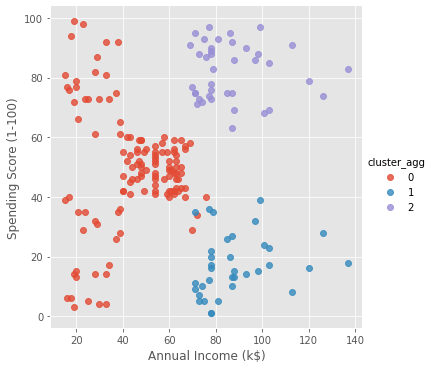

In [9]:
sns.lmplot("Annual Income (k$)", "Spending Score (1-100)", data=data, hue="cluster_agg", fit_reg=False)

In [10]:
sns.lmplot("Annual Income (k$)", "Spending Score (1-100)", data=data), hue="cluster_div", fit_reg=False)

SyntaxError: unmatched ')' (<ipython-input-10-5fdeefd247ca>, line 1)